## IDEA:
### Younger people tend to use Citi Bike more often than older people in the evenings

## NULL HYPOTHESIS:
### The proportion of people born in or after 1980 biking between 7pm-3am is the same or lower than the proportion of people born before 1980 biking biking between 7pm-3am.
### H0: Biker young <= Biker old¶
## Alternative HYPOTHESIS:
### The proportion of people born in or after 1980 biking between 7pm-3am is significatily higher than the proportion of people born before 1980 biking biking between 7pm-3am.

In [1]:
from __future__ import print_function
import os
import pylab as pl
from zipfile import PyZipFile
import pandas as pd
from dateutil import parser
import numpy as ny

%pylab inline

puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.csv.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201805'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# i.e. df['starttime'] or as attributes: df.starttime. 
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,367,2018-05-01 05:06:16.5840,2018-05-01 05:12:23.9650,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,1,2018-05-01 05:06:16.584
1,1313,2018-05-01 06:25:49.4250,2018-05-01 06:47:42.7120,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,1,2018-05-01 06:25:49.425
2,1798,2018-05-01 06:40:26.4450,2018-05-01 07:10:25.1790,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,2,2018-05-01 06:40:26.445
3,518,2018-05-01 07:06:02.9730,2018-05-01 07:14:41.0040,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,1,2018-05-01 07:06:02.973
4,109,2018-05-01 07:26:32.3450,2018-05-01 07:28:21.5420,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,1,2018-05-01 07:26:32.345


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'gender','usertype'], axis=1, inplace=True)

In [7]:
df.head()

,birth year,date
0,1965,2018-05-01 05:06:16.584
1,1956,2018-05-01 06:25:49.425
2,1959,2018-05-01 06:40:26.445
3,1986,2018-05-01 07:06:02.973
4,1991,2018-05-01 07:26:32.345


Text(0,0.5,'Number of bikers')

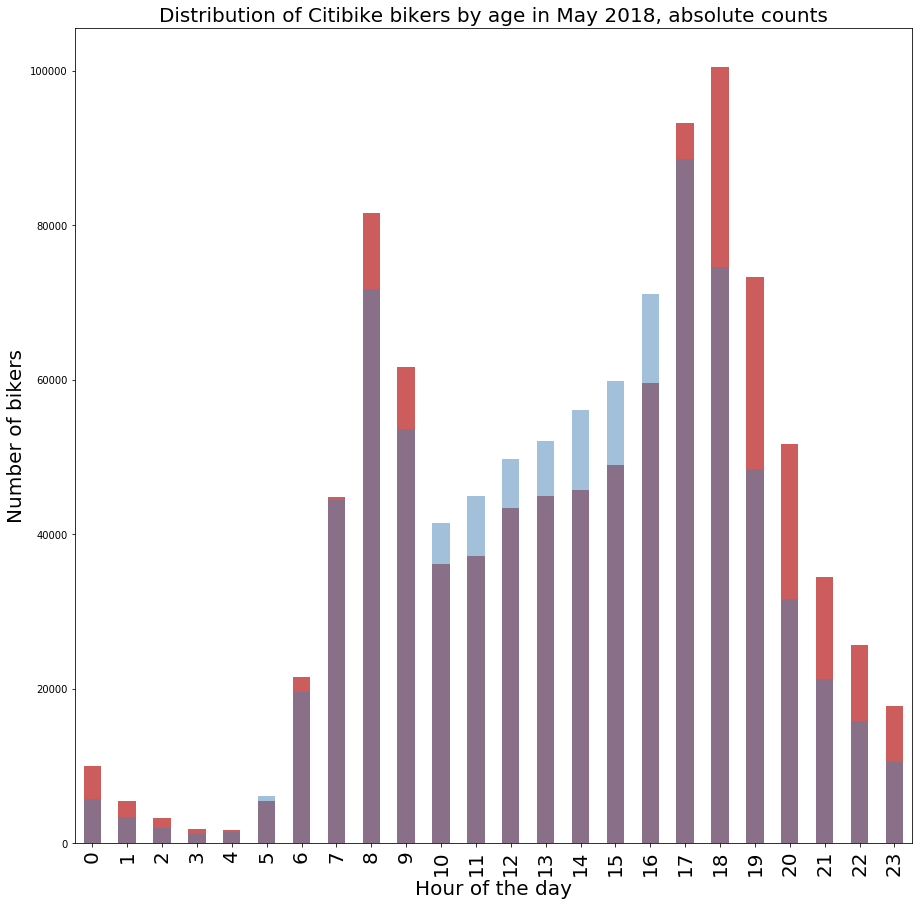

In [8]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_young = 1
((df['date'][df['birth year'] >= 1980].groupby([df['date'].dt.hour]).count()) / norm_young).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Young Bikers')

norm_old = 1
ax = ((df['date'][df['birth year'] < 1980].groupby([df['date'].dt.hour]).count()) / norm_old).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Old Bikers')

tmp = ax.xaxis.set_ticklabels([i for i in range(24)], fontsize=20)
pl.title('Distribution of Citibike bikers by age in May 2018, absolute counts', fontsize = 20)
pl.xlabel('Hour of the day', fontsize = 20)
pl.ylabel('Number of bikers', fontsize = 20)

##### Figure 1: Distribution of Citibike bikers by age against hour of the day in May 2018, absolute counts

Text(0.5,1,'Distribution of Citibike bikers by age in May 2018, absolute counts, with statistical errors')

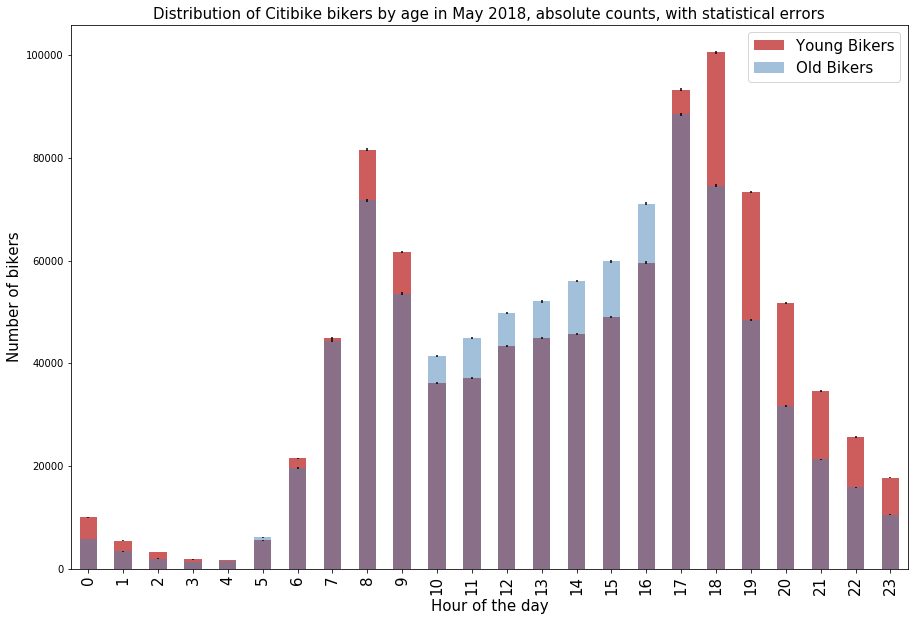

In [9]:
fig=pl.figure(figsize(15,10))

counts_young = df['date'][df['birth year'] >= 1980].groupby([df.date.dt.hour]).count()
norm_young = 1
error_young = np.sqrt(counts_young)
ax=((counts_young) / norm_young).plot(kind="bar",color='IndianRed', 
                              yerr=[((error_young) / norm_young, (error_young) / norm_young)], label='Young Bikers')

counts_old = df.date[df['birth year'] < 1980].groupby([df.date.dt.hour]).count()
norm_old = 1
error_old = np.sqrt(counts_old)
((counts_old) / norm_old).plot(kind="bar", alpha=0.5, yerr=[((error_old) / norm_old, (error_old) / norm_old)], 
                           color='SteelBlue', label='Old Bikers')

ax.xaxis.set_ticklabels([i for i in range(24)], fontsize=15)
ax.set_ylabel ("Number of bikers", fontsize=15)
ax.set_xlabel ("Hour of the day", fontsize=15)
pl.legend(['Young Bikers','Old Bikers'], fontsize=15)
pl.title('Distribution of Citibike bikers by age in May 2018, absolute counts, with statistical errors', 
         fontsize=15)

##### Figure 2: Distribution of Citibike bikers by age against hour of the day in May 2018, with statistical errors

Text(0.5,1,'Distribution of Citibike bikers by age in May 2018, absolute counts, normalized')

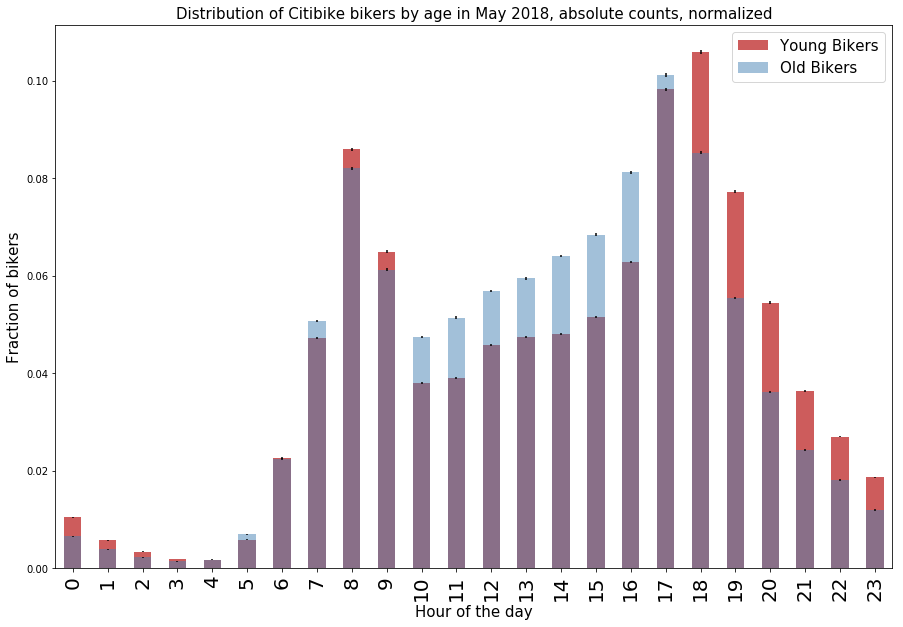

In [34]:
fig = pl.figure(figsize(15,10))

counts_young = df['date'][df['birth year'] >= 1980].groupby([df.date.dt.hour]).count()
norm_young = counts_young.sum()
error_young = np.sqrt(counts_young)
((counts_young) / norm_young).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_young) / norm_young, (error_young) / norm_young)], 
                           label='Young Bikers')

counts_old = df['date'][df['birth year'] < 1980].groupby([df.date.dt.hour]).count()
norm_old = counts_old.sum()
error_old = np.sqrt(counts_old)
ax = ((counts_old) / norm_old).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_old) / norm_old, (error_old) / norm_old)], 
                                color='SteelBlue', label='Old Bikers')

ax.xaxis.set_ticklabels([i for i in range(24)], fontsize=20)
ax.set_ylabel ("Fraction of bikers", fontsize=15)
ax.set_xlabel ("Hour of the day", fontsize=15)
pl.legend(['Young Bikers','Old Bikers'], fontsize=15)
pl.title('Distribution of Citibike bikers by age in May 2018, absolute counts, normalized', 
         fontsize=15)

#### Figure 3: Distribution of Citibike bikers by age against hour of the day in May 2018, normalized

## Set up the test of proportions: Z-test
I need the fraction of young bikers that bikes during the night and the fraction that bikes during the day, and the same for old bikers

In [14]:
counts_young[4:-5]

date
4       1684
5       5515
6      21483
7      44826
8      81604
9      61656
10     36107
11     37111
12     43423
13     44988
14     45689
15     48946
16     59601
17     93249
18    100527
Name: date, dtype: int64

In [21]:
counts_young[-5:]

date
19    73333
20    51730
21    34518
22    25626
23    17711
Name: date, dtype: int64

In [26]:
day_young = sum(counts_young[4:-5]) * 1.0 / norm_young  #fraction of young biker riding in the day
night_young = (sum(counts_young[:4]) + sum(counts_young[-5:])) * 1.0 / norm_young  #fraction of young biker riding at night
eday_young = np.sqrt(sum(error_young[4:-5]**2)) / norm_young  #error on fraction number of young biker riding in the day
enight_young = np.sqrt((sum(error_young[:4] + sum(error_young[-5:]))**2)) / norm_young #error on fraction number of young biker riding at night

In [27]:
day_old = sum(counts_old[4:-5]) * 1.0 / norm_old 
night_old = (sum(counts_old[:4]) + sum(counts_old[-5:])) * 1.0 / norm_old 
eday_old = np.sqrt(sum(error_old[4:-5]**2)) / norm_old 
enight_old = np.sqrt((sum(error_old[:4] + sum(error_old[-5:]))**2)) / norm_old 

Youmg biker: day:0.765, night:0.235, day error:0.001, night error:0.004
Old biker: day:0.840, night:0.160, day error:0.001, night error:0.004


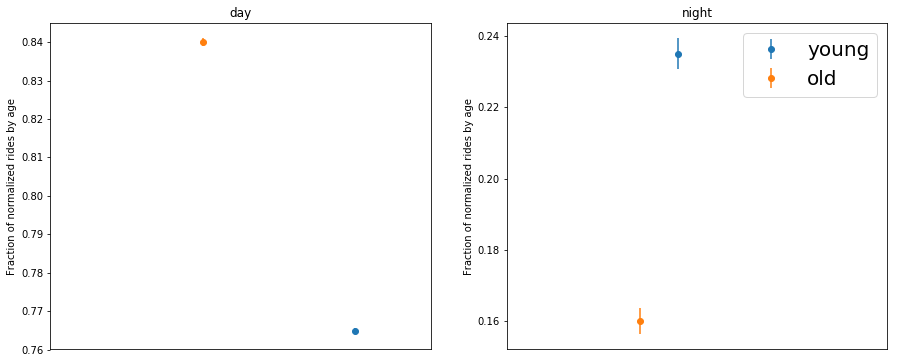

In [36]:
print("Youmg biker: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_young, night_young, eday_young, enight_young))
print("Old biker: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_old, night_old, eday_old, enight_old))

fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

ax1.errorbar([0.4], [day_young], yerr=[eday_young], fmt='o', label='young')
ax1.errorbar([0.2], [day_old], yerr=[eday_old], fmt='o', label='old')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [night_young], yerr=[enight_young], fmt='o', label='young')
ax2.errorbar([0.2], [night_old], yerr=[enight_old], fmt='o', label='old')
ax1.set_xlim(0, 0.5)
ax1.set_title("day")
ax2.set_title("night")
ax2.set_ylabel("Fraction of normalized rides by age")
ax1.set_ylabel("Fraction of normalized rides by age")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

## Figure 4: Fraction of Young and Old Citibike bikers in May 2018 for Day and Night

## Z-test formula : z = (p0 - p1)/SE

In [32]:
P0mP1 = night_young - night_old
print ("difference between young and old riders at night: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between young and old riders at night:  0.075201928415
We must check the significance before we reject the Null Hypothesis


In [33]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(night_young, night_old, norm_young, norm_old), norm_young, norm_old)
# print (sp_stdev_mw)
z = zscore(night_young, night_old, sp_stdev_mw)
print ("The z statistics is %.2f"%z)

The z statistics is 127.10


## When Z score is 127.10, the P-Value is < 0.00001, which is smaller then my chosen alpha=0.05 - so yes, it is statistically significant (by a lot!)

## We reject the Null Hypothesis that The proportion of people born in or after 1980 biking between 7pm-3am is the same or lower than the proportion of people born before 1980 biking biking between 7pm-3am. p < 0.05